# Linear Regression - Boston Housing Dataset

    This dataset can be found in the sklearn library.
    We'll be studying the dataset below.

In [170]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
# Importing the boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [172]:
# As boston dataset is not a kind of Pandas DataFrame, lets see what kind of data are...
type(boston)
boston.keys()
#So this is a dictionary type

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

*Loading the dataset into DataFrame*

In [173]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [174]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We don't have target variable, so we will create a new column and add the data to it

In [175]:
boston_df['MEDV'] = boston.target

In [176]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Checking the null values through visualization

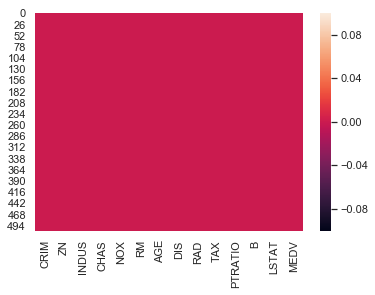

In [177]:
sns.heatmap(boston_df.isnull())

We can clearly see that we don't have any null values in the our dataset.

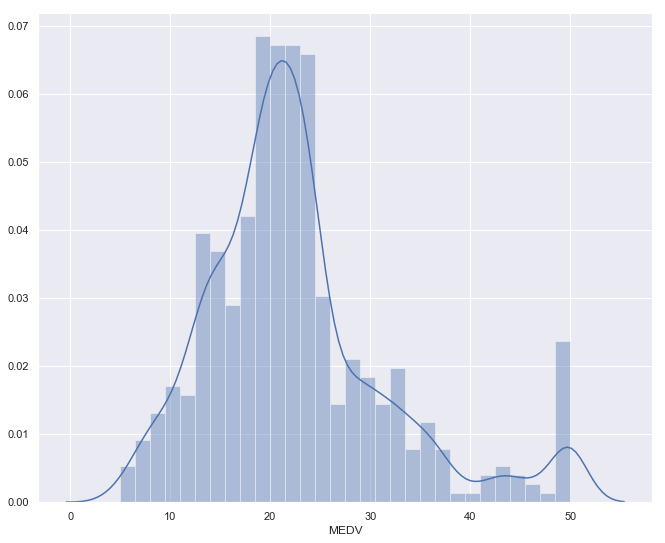

In [191]:
sns.set(rc={'figure.figsize':(11,9)})
sns.distplot(boston_df['MEDV'],bins=30)

Computing Correlation matrix

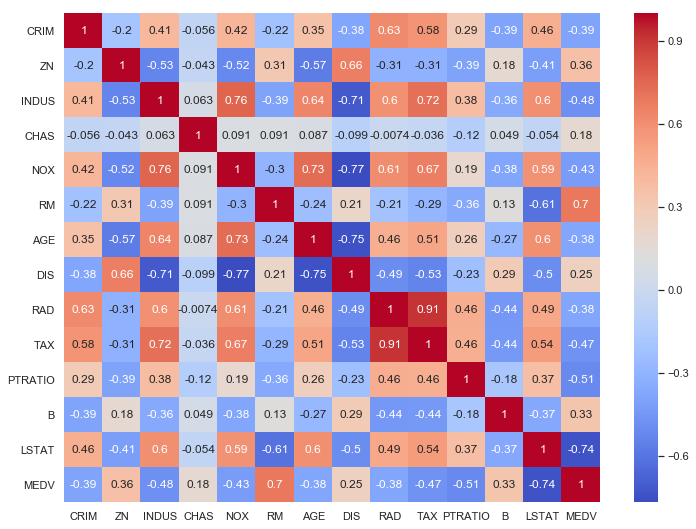

In [179]:
sns.heatmap(data=boston_df.corr(),annot=True, cmap='coolwarm')

In [180]:
X = boston_df[['LSTAT','RM']]
y = boston_df['MEDV']

In [181]:
#importin sklearn library components to split the dataset into training and testing data sets
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [184]:
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
#Model evaluation for training set
y_train_predictions = lin_mod.predict(X_train)
print("RMSE",(np.sqrt(mean_squared_error(y_train,y_train_predictions))))
print("R2 Score",r2_score(y_train,y_train_predictions))

RMSE 5.627657831858799
R2 Score 0.6099162694401525


In [186]:
# Model evaluation for testing set
y_test_predictions = lin_mod.predict(X_test)
print("RMSE",(np.sqrt(mean_squared_error(y_test,y_test_predictions))))
print("R2 Score",r2_score(y_test,y_test_predictions))

RMSE 5.379079042093224
R2 Score 0.6843090583339466


In [187]:
lin_mod.coef_

array([-0.67762654,  4.12674118])

In [188]:
lin_mod.intercept_

5.316818471096035

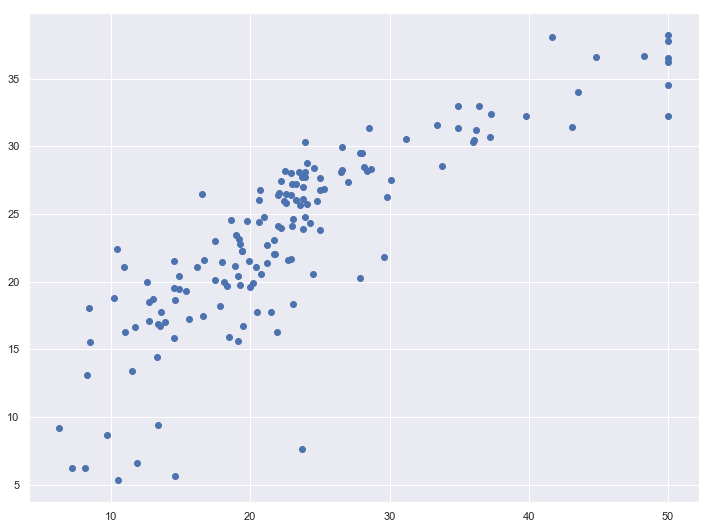

In [189]:
plt.scatter(y_test,y_test_predictions)
plt.show()

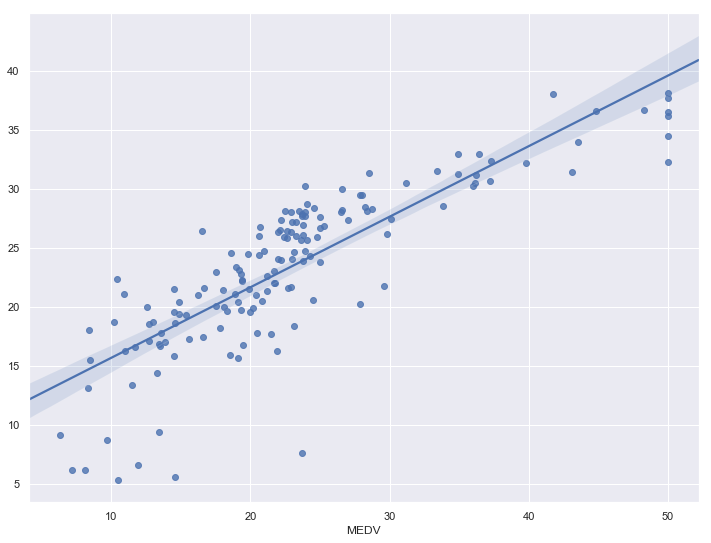

In [190]:
sns.regplot(y_test,y_test_predictions)